In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.stats import gaussian_kde
from matplotlib.animation import PillowWriter, FuncAnimation
import seaborn as sns
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
import sys
import os

# average of 10 shots per frame and 100 frames per scan (example2.jl)

## Single time delay

In [ ]:
load_dir = "../work_2024_09_20/tau_-200.0as/scan_1"
pr_data = np.loadtxt(f"{load_dir}/pr.dat")
i_data = np.loadtxt(f"{load_dir}/i-.dat")
phi_data = np.loadtxt(f"{load_dir}/phi.dat")
pr_data.shape

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.plot(i_data, pr_data[1, :])

ax.set_xlabel('$i_-$ (normalized)', fontsize=20)
ax.set_ylabel('PDF', fontsize=20)


plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

# x = np.arange(-2, 2, 0.1)
# y = np.arange(-2, 2, 0.1)
# w_f = np.zeros((len(x), len(y)), dtype=float)
# # X, Y = np.meshgrid(x, y)
# for i, x_i in enumerate(x):
#     for j, y_j in enumerate(y):
#         w_f[i, j] = wigner_function(x_i, y_j, s_r, s_theta, a_x_ini, a_y_ini)

x, y = np.meshgrid(phi_data, i_data, indexing='ij')

surf = ax.plot_surface(x, y, pr_data, cmap='viridis', antialiased=False)

ax.set_xlabel('angle', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('$i_-$', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('pr($\phi$, $i_-$)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
# Set viewing angle
ax.view_init(elev=30, azim=30)


ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, pr_data)

ax.set_xlabel('angle', fontsize=20)
ax.set_ylabel('$i_-$', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [ ]:
load_dir = "../work_2024_09_20/tau_-2600.0as/scan_1"
Q = np.loadtxt(f"{load_dir}/Q.dat")
P = np.loadtxt(f"{load_dir}/P.dat")
W = np.loadtxt(f"{load_dir}/W.dat")

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

x, y = np.meshgrid(Q, P)

surf = ax.plot_surface(x, y, W, cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)
# ax.set_xlim([-20, 0])
# ax.set_ylim([-10, 10])


plt.show()

## Single time delay with lower range of $i_-$

In [ ]:
load_dir = "../work_avg/tau_0.0as/scan_2"
pr_data = np.loadtxt(f"{load_dir}/pr.dat")
i_data = np.loadtxt(f"{load_dir}/i-.dat")
phi_data = np.loadtxt(f"{load_dir}/phi.dat")
pr_data.shape

In [ ]:
plt.plot(i_data, pr_data[10, :])
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

# x = np.arange(-2, 2, 0.1)
# y = np.arange(-2, 2, 0.1)
# w_f = np.zeros((len(x), len(y)), dtype=float)
# # X, Y = np.meshgrid(x, y)
# for i, x_i in enumerate(x):
#     for j, y_j in enumerate(y):
#         w_f[i, j] = wigner_function(x_i, y_j, s_r, s_theta, a_x_ini, a_y_ini)

x, y = np.meshgrid(phi_data, i_data, indexing='ij')

surf = ax.plot_surface(x, y, pr_data, cmap='viridis', antialiased=False)

ax.set_xlabel('angle', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('$i_-$', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('pr($\phi$, $i_-$)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
# Set viewing angle
ax.view_init(elev=30, azim=30)


ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, pr_data)

ax.set_xlabel('angle', fontsize=20)
ax.set_ylabel('$i_-$', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [ ]:
load_dir = "../work/tau_0.0as/scan_2"
Q = np.loadtxt(f"{load_dir}/Q.dat")
P = np.loadtxt(f"{load_dir}/P.dat")
W = np.loadtxt(f"{load_dir}/W.dat")

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

x, y = np.meshgrid(Q, P)

surf = ax.plot_surface(x, y, W, cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)
# ax.set_xlim([-20, 0])
# ax.set_ylim([-10, 10])


plt.show()

## Evolution of histogram

In [ ]:
timedelay = np.loadtxt("../example_data/timedelay.dat")
full_data = []
for i in range(len(timedelay)):
    full_data.append(np.loadtxt(f"../example_data/{i}"))

full_data = np.array(full_data)
np.shape(full_data)

In [ ]:
save_dir = "./"
for delay_index in range(full_data.shape[0]):
    data = full_data[delay_index, :, :] # Take subset of the full data

    # Number of columns (parameters)
    ncol = data.shape[1]

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")

    # Define the colormap 
    my_cmap = plt.cm.inferno

    # Define the yticks (corresponding to columns/parameters)
    yticks = np.linspace(0, 2*np.pi, ncol)

    # Create evenly spaced bins between the minimum and maximum of the entire data
    xbins = np.linspace(data.min(), data.max(), 20)  # 50 bins for uniform distribution
    xcenter = np.convolve(xbins, np.ones(2), "valid") / 2  # Center points of the bins
    xwidth = np.diff(xbins)  # Width of each bin

    # Loop through each column and calculate histograms
    for i, ytick in enumerate(yticks):

        # Extract the current column from the data
        col = data[:, i]

        # Calculate histogram values for this column
        histvals, _ = np.histogram(col, bins=xbins)

        # Plot the histogram as bars along the Y-axis (for each parameter)
        ax.bar(left=xcenter, height=histvals, width=xwidth, zs=ytick, zdir="y", 
            color=my_cmap(i / ncol), alpha=0.666, edgecolor="grey", linewidth=0.3)

    # Set axis labels
    ax.set_xlabel("$i_-$", fontsize=20)
    ax.set_ylabel("Phase", fontsize=20)
    ax.set_zlabel("Frequency", fontsize=20)

    ax.set_title(f'Histogram ($\\tau = {1000*timedelay[delay_index]}$ as)', fontsize=20)

    # Label every other column number on the Y-axis
    ax.set_yticks(yticks[::20])
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='z', labelsize=15)
    ax.yaxis.labelpad=20

    # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
    # cbar.ax.tick_params(labelsize=15)
    # Display the plot
    plt.show()
    # plt.savefig(f"{save_dir}/{delay_index}.png", dpi=500)
    # plt.close(fig)


In [ ]:
save_dir = "./"
for delay_index in range(full_data.shape[0]):
    fig, ax = plt.subplots(figsize=(10, 7))

    # delay_index = 0
    phase_index = 0

    def animate(index):

        ax.clear()

        sns.histplot(full_data[delay_index, :index, phase_index], kde=True, bins=30, ax=ax)
        ax.set_xlabel("$i_-$", fontsize=20)
        ax.set_ylabel("Frequency", fontsize=20)

        ax.set_title(f'Histogram ($\\tau = {1000*timedelay[delay_index]}$ as, Phase = {np.linspace(0, 2*np.pi, full_data.shape[2])[phase_index]})', fontsize=20)

        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        # sns.kdeplot(data_array[:, 10])
        # plt.show()

    animation = FuncAnimation(fig, animate, frames=range(0, full_data.shape[1]))
    animation.save(f"{save_dir}/{delay_index}.gif", dpi = 300, writer=PillowWriter(fps=5))
    plt.close(fig)

## All time delay

### Single scan

In [104]:
Q = []
P = []
W = []

scan_num = 1

load_dir = "../work_2024_09_20"
timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")

for i in range(len(timedelay)):
    Q.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/Q.dat"))
    P.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/P.dat"))
    W.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/W.dat"))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

delay_index = 8

x, y = np.meshgrid(Q[delay_index], P[delay_index])

surf = ax.plot_surface(x, y, W[delay_index], cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.zaxis.labelpad=20

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W[delay_index])

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))


def animate(index):
    x, y = np.meshgrid(Q[index], P[index])


    ax.clear()

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    ax.contourf(x, y, W[index])

    ax.set_xlabel('Q', fontsize=20)
    ax.set_ylabel('P', fontsize=20)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

    # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
    # cbar.ax.tick_params(labelsize=15)


    ax.set_title(f'Wigner Plot ($\\tau = {timedelay[index]}$ as)', fontsize=20)
    # if s_theta != 0:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = \pi/{np.pi/s_theta}$', ha='center', va='center', fontsize=20)
    # else:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = 0$', ha='center', va='center', fontsize=20)

animation = FuncAnimation(fig, animate, frames=range(0, len(timedelay)))
animation.save(f"{load_dir}/w_plot_animation_scan_{scan_num}.gif", dpi = 300, writer=PillowWriter(fps=2))

### All scans

In [109]:
Q = []
P = []
W = []

scan_range = range(1,10,1) #from scan_1 to scan_9

load_dir = "../work_2024_09_20"
timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")

for scan_num in scan_range:
    for i in range(len(timedelay)):
        Q.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/Q.dat"))
        P.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/P.dat"))
        W.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/W.dat"))


    fig, ax = plt.subplots(figsize=(10, 10))


    def animate(index):
        x, y = np.meshgrid(Q[index], P[index])


        ax.clear()

        # plot a 3D wireframe like in the example mplot3d/wire3d_demo
        ax.contourf(x, y, W[index])

        ax.set_xlabel('Q', fontsize=20)
        ax.set_ylabel('P', fontsize=20)

        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)

        # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
        # cbar.ax.tick_params(labelsize=15)


        ax.set_title(f'Wigner Plot ($\\tau = {timedelay[index]}$ as)', fontsize=20)
        # if s_theta != 0:
        #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = \pi/{np.pi/s_theta}$', ha='center', va='center', fontsize=20)
        # else:
        #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = 0$', ha='center', va='center', fontsize=20)

    animation = FuncAnimation(fig, animate, frames=range(0, len(timedelay)))
    animation.save(f"{load_dir}/w_plot_animation_scan_{scan_num}.gif", dpi = 300, writer=PillowWriter(fps=2))

    plt.close()

# average of 10 shots per frames with 100frames * 10 scan = 1000 datapoints (example3.jl)

## Single time delay

In [ ]:
pr_data = np.loadtxt("../work2_2024_09_20/tau_-200.0as/pr.dat")
i_data = np.loadtxt("../work2_2024_09_20/tau_-200.0as/i-.dat")
phi_data = np.loadtxt("../work2_2024_09_20/tau_-200.0as/phi.dat")
pr_data.shape

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.plot(i_data, pr_data[1, :])

ax.set_xlabel('$i_-$', fontsize=20)
ax.set_ylabel('PDF', fontsize=20)


plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

# x = np.arange(-2, 2, 0.1)
# y = np.arange(-2, 2, 0.1)
# w_f = np.zeros((len(x), len(y)), dtype=float)
# # X, Y = np.meshgrid(x, y)
# for i, x_i in enumerate(x):
#     for j, y_j in enumerate(y):
#         w_f[i, j] = wigner_function(x_i, y_j, s_r, s_theta, a_x_ini, a_y_ini)

x, y = np.meshgrid(phi_data, i_data, indexing='ij')

surf = ax.plot_surface(x, y, pr_data, cmap='viridis', antialiased=False)

ax.set_xlabel('angle', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('$i_-$', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('pr($\phi$, $i_-$)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
# Set viewing angle
ax.view_init(elev=30, azim=30)


ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, pr_data)

ax.set_xlabel('angle', fontsize=20)
ax.set_ylabel('$i_-$', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [ ]:
load_dir = "../work2_2024_09_20/tau_-200.0as"
Q = np.loadtxt(f"{load_dir}/Q.dat")
P = np.loadtxt(f"{load_dir}/P.dat")
W = np.loadtxt(f"{load_dir}/W.dat")

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

x, y = np.meshgrid(Q, P)

surf = ax.plot_surface(x, y, W, cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

# "average" of 1 shots per frame and 1000 frames per scan (example4.jl)

## Single time delay

In [ ]:
load_dir = "../work_2024_09_24/tau_-200.0as/scan_0"
pr_data = np.loadtxt(f"{load_dir}/pr.dat")
i_data = np.loadtxt(f"{load_dir}/i-.dat")
phi_data = np.loadtxt(f"{load_dir}/phi.dat")
pr_data.shape

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.plot(i_data, pr_data[1, :])

ax.set_xlabel('$i_-$(noramlized)', fontsize=20)
ax.set_ylabel('PDF', fontsize=20)


plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

# x = np.arange(-2, 2, 0.1)
# y = np.arange(-2, 2, 0.1)
# w_f = np.zeros((len(x), len(y)), dtype=float)
# # X, Y = np.meshgrid(x, y)
# for i, x_i in enumerate(x):
#     for j, y_j in enumerate(y):
#         w_f[i, j] = wigner_function(x_i, y_j, s_r, s_theta, a_x_ini, a_y_ini)

x, y = np.meshgrid(phi_data, i_data, indexing='ij')

surf = ax.plot_surface(x, y, pr_data, cmap='viridis', antialiased=False)

ax.set_xlabel('angle', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('$i_-$', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('pr($\phi$, $i_-$)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
# Set viewing angle
ax.view_init(elev=30, azim=30)


ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, pr_data)

ax.set_xlabel('angle', fontsize=20)
ax.set_ylabel('$i_-$', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [ ]:
load_dir = "../work_2024_09_24/tau_-200.0as/scan_0"
Q = np.loadtxt(f"{load_dir}/Q.dat")
P = np.loadtxt(f"{load_dir}/P.dat")
W = np.loadtxt(f"{load_dir}/W.dat")

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

x, y = np.meshgrid(Q, P)

surf = ax.plot_surface(x, y, W, cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)
# ax.set_xlim([-20, 0])
# ax.set_ylim([-10, 10])


plt.show()

## All time delay

In [152]:
Q = []
P = []
W = []

scan_num = 0

load_dir = "../work_2024_09_24"
timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")

for i in range(len(timedelay)):
    Q.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/Q.dat"))
    P.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/P.dat"))
    W.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/W.dat"))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

delay_index = 8

x, y = np.meshgrid(Q[delay_index], P[delay_index])

surf = ax.plot_surface(x, y, W[delay_index], cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.zaxis.labelpad=20

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W[delay_index])

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))


def animate(index):
    x, y = np.meshgrid(Q[index], P[index])


    ax.clear()

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    ax.contourf(x, y, W[index])

    ax.set_xlabel('Q', fontsize=20)
    ax.set_ylabel('P', fontsize=20)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

    # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
    # cbar.ax.tick_params(labelsize=15)


    ax.set_title(f'Wigner Plot ($\\tau = {timedelay[index]}$ as)', fontsize=20)
    # if s_theta != 0:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = \pi/{np.pi/s_theta}$', ha='center', va='center', fontsize=20)
    # else:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = 0$', ha='center', va='center', fontsize=20)

animation = FuncAnimation(fig, animate, frames=range(0, len(timedelay)))
animation.save(f"{load_dir}/w_plot_animation.gif", dpi = 300, writer=PillowWriter(fps=2))

### Find the center of wigner function

In [2]:
import sys
import os

script_dir = os.path.abspath("../src")
sys.path.append(script_dir)

import ellipse_fitting as ef

In [3]:
Q = []
P = []
W = []

scan_num = 0

load_dir = "../work_2024_09_24"
timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")

for i in range(len(timedelay)):
    Q.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/Q.dat"))
    P.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/P.dat"))
    W.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/W.dat"))

In [4]:
w_center_x = np.zeros(len(timedelay))
w_center_y = np.zeros(len(timedelay))
w_max = np.zeros(len(timedelay))

for delay_index in range(len(timedelay)):
    obj = ef.ellipse_fit(Q[delay_index], P[delay_index], W[delay_index])
    w_center_x[delay_index], w_center_y[delay_index], w_max[delay_index] = obj.find_center()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.plot(timedelay, w_center_x, '-o', color='b')
ax.plot(timedelay, w_center_y, '-*', color='r')

ax.legend(['Q Coordinate', 'P Coordinate'], fontsize=18)

ax.set_xlabel('time delay (as)', fontsize=20)
ax.set_ylabel('Coordinates', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


plt.show()

### Fit an ellipse to find the squeezing

In [6]:
delay_index = 8

x, y = np.meshgrid(Q[delay_index], P[delay_index])
z = W[delay_index]

obj = ef.ellipse_fit(Q[delay_index], P[delay_index], W[delay_index])
x_intersect, y_intersect, z_intersect, Z_plane = obj.find_intersection()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

surf = ax.plot_surface(x, y, z, cmap='viridis', antialiased=False)
ax.plot_surface(x, y, Z_plane, color='red', alpha=0.3)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.zaxis.labelpad=20

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, z)
ax.scatter(x_intersect, y_intersect, color='black', s=10, label='Intersection')

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [8]:
opt_parameters = obj.find_opt_params([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [ ]:
# Define ellipse function
def ellipse_implicit(x, y, params):
    A, B, C, D, E, F = params
    return A * x**2 + B * x * y + C * y**2 + D * x + E * y + F

# From the ellipse, find the major axis, minor axis, center and the angle

def canonical_params(params):
    A, B, C, D, E, F = params
    b = -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F)*((A+C) + np.sqrt((A-C)**2 + B**2)))/(B**2 - 4*A*C)
    a = -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F)*((A+C) - np.sqrt((A-C)**2 + B**2)))/(B**2 - 4*A*C)
    x_0 = (2*C*D - B*E)/(B**2 - 4*A*C)
    y_0 = (2*A*E - B*D)/(B**2 - 4*A*C)
    theta = 1/2 * np.arctan2(-B, C-A)

    return a, b, x_0, y_0, theta

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

# plot to see if the fitting is correct or not.
z_fit = ellipse_implicit(x, y, opt_parameters)
intersect_plot = ax.scatter(x_intersect, y_intersect, label = 'Intersection points')
ax.contour(x, y, z_fit, levels=[0], colors='red', linewidths=2)

contour_label = plt.Line2D([], [], color='red', label='Fitted ellipse')
ax.legend(handles=[intersect_plot, contour_label], fontsize=20)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
canonical_params(opt_parameters)

In [ ]:
w_center_x[delay_index], w_center_y[delay_index] # To check if the maximum is closest to the fitted ellipse center

Comibining everything together to get time delay variation 

In [20]:
major_axis = np.zeros(len(timedelay)-1)
minor_axis = np.zeros(len(timedelay)-1)
theta = np.zeros(len(timedelay)-1)
for delay_index in range(1, len(timedelay)): # removing first delay because it is bad data

    obj = ef.ellipse_fit(Q[delay_index], P[delay_index], W[delay_index])
    ini_guess = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    opt_params = obj.find_opt_params(ini_guess)
    

    major_axis[delay_index-1], minor_axis[delay_index-1], _, _, theta[delay_index-1] = canonical_params(opt_params)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.plot(timedelay[1:], major_axis, '-o', color='b')
ax.plot(timedelay[1:], minor_axis, '-*', color='r')
# ax.plot(timedelay[1:], theta, '-d', color='g')

ax.legend(['Semi Major axis', 'Semi Minor axis'], fontsize=18)

ax.set_xlabel('time delay (as)', fontsize=20)
ax.set_ylabel('Fitted ellipse axis values', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


plt.show()

# "average" of 1 shots per frame and 1000 frames per scan with higher intensity (example4.jl)

The inensity is $~0.3 TW/cm^2$

## Single time delay

In [ ]:
load_dir = "../work_2024_09_25/tau_-200.0as/scan_0"
pr_data = np.loadtxt(f"{load_dir}/pr.dat")
i_data = np.loadtxt(f"{load_dir}/i-.dat")
phi_data = np.loadtxt(f"{load_dir}/phi.dat")
pr_data.shape

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.plot(i_data, pr_data[1, :])

ax.set_xlabel('$i_-$(noramlized)', fontsize=20)
ax.set_ylabel('PDF', fontsize=20)


plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

# x = np.arange(-2, 2, 0.1)
# y = np.arange(-2, 2, 0.1)
# w_f = np.zeros((len(x), len(y)), dtype=float)
# # X, Y = np.meshgrid(x, y)
# for i, x_i in enumerate(x):
#     for j, y_j in enumerate(y):
#         w_f[i, j] = wigner_function(x_i, y_j, s_r, s_theta, a_x_ini, a_y_ini)

x, y = np.meshgrid(phi_data, i_data, indexing='ij')

surf = ax.plot_surface(x, y, pr_data, cmap='viridis', antialiased=False)

ax.set_xlabel('angle', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('$i_-$', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('pr($\phi$, $i_-$)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
# Set viewing angle
ax.view_init(elev=30, azim=30)


ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, pr_data)

ax.set_xlabel('angle', fontsize=20)
ax.set_ylabel('$i_-$', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [ ]:
load_dir = "../work_2024_09_25/tau_-200.0as/scan_0"
Q = np.loadtxt(f"{load_dir}/Q.dat")
P = np.loadtxt(f"{load_dir}/P.dat")
W = np.loadtxt(f"{load_dir}/W.dat")

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

x, y = np.meshgrid(Q, P)

surf = ax.plot_surface(x, y, W, cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)
# ax.set_xlim([-20, 0])
# ax.set_ylim([-10, 10])


plt.show()

## Evolution of histogram

In [ ]:
timedelay = np.loadtxt("../example_data/timedelay.dat")
full_data = []
for i in range(len(timedelay)):
    full_data.append(np.loadtxt(f"../example_data/{i}"))

full_data = np.array(full_data)
np.shape(full_data)

In [ ]:
save_dir = "./"
for delay_index in range(full_data.shape[0]):
    data = full_data[delay_index, :, :] # Take subset of the full data

    # Number of columns (parameters)
    ncol = data.shape[1]

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")

    # Define the colormap 
    my_cmap = plt.cm.inferno

    # Define the yticks (corresponding to columns/parameters)
    yticks = np.linspace(0, 2*np.pi, ncol)

    # Create evenly spaced bins between the minimum and maximum of the entire data
    xbins = np.linspace(data.min(), data.max(), 20)  # 50 bins for uniform distribution
    xcenter = np.convolve(xbins, np.ones(2), "valid") / 2  # Center points of the bins
    xwidth = np.diff(xbins)  # Width of each bin

    # Loop through each column and calculate histograms
    for i, ytick in enumerate(yticks):

        # Extract the current column from the data
        col = data[:, i]

        # Calculate histogram values for this column
        histvals, _ = np.histogram(col, bins=xbins)

        # Plot the histogram as bars along the Y-axis (for each parameter)
        ax.bar(left=xcenter, height=histvals, width=xwidth, zs=ytick, zdir="y", 
            color=my_cmap(i / ncol), alpha=0.666, edgecolor="grey", linewidth=0.3)

    # Set axis labels
    ax.set_xlabel("$i_-$", fontsize=20)
    ax.set_ylabel("Phase", fontsize=20)
    ax.set_zlabel("Frequency", fontsize=20)

    ax.set_title(f'Histogram ($\\tau = {1000*timedelay[delay_index]}$ as)', fontsize=20)

    # Label every other column number on the Y-axis
    ax.set_yticks(yticks[::20])
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='z', labelsize=15)
    ax.yaxis.labelpad=20

    # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
    # cbar.ax.tick_params(labelsize=15)
    # Display the plot
    plt.show()
    # plt.savefig(f"{save_dir}/{delay_index}.png", dpi=500)
    # plt.close(fig)


In [ ]:
save_dir = "./"
for delay_index in range(full_data.shape[0]):
    fig, ax = plt.subplots(figsize=(10, 7))

    # delay_index = 0
    phase_index = 0

    def animate(index):

        ax.clear()

        sns.histplot(full_data[delay_index, :index, phase_index], kde=True, bins=30, ax=ax)
        ax.set_xlabel("$i_-$", fontsize=20)
        ax.set_ylabel("Frequency", fontsize=20)

        ax.set_title(f'Histogram ($\\tau = {1000*timedelay[delay_index]}$ as, Phase = {np.linspace(0, 2*np.pi, full_data.shape[2])[phase_index]})', fontsize=20)

        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        # sns.kdeplot(data_array[:, 10])
        # plt.show()

    animation = FuncAnimation(fig, animate, frames=range(0, full_data.shape[1]))
    animation.save(f"{save_dir}/{delay_index}.gif", dpi = 300, writer=PillowWriter(fps=5))
    plt.close(fig)

## All time delay

In [17]:
Q = []
P = []
W = []

scan_num = 0

load_dir = "../work_2024_09_25"
timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")

for i in range(len(timedelay)):
    Q.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/Q.dat"))
    P.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/P.dat"))
    W.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/W.dat"))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

delay_index = 10

x, y = np.meshgrid(Q[delay_index], P[delay_index])

surf = ax.plot_surface(x, y, W[delay_index], cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.zaxis.labelpad=20

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W[delay_index])

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))


def animate(index):
    x, y = np.meshgrid(Q[index], P[index])


    ax.clear()

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    ax.contourf(x, y, W[index])

    ax.set_xlabel('Q', fontsize=20)
    ax.set_ylabel('P', fontsize=20)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

    # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
    # cbar.ax.tick_params(labelsize=15)


    ax.set_title(f'Wigner Plot ($\\tau = {timedelay[index]}$ as)', fontsize=20)
    # if s_theta != 0:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = \pi/{np.pi/s_theta}$', ha='center', va='center', fontsize=20)
    # else:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = 0$', ha='center', va='center', fontsize=20)

animation = FuncAnimation(fig, animate, frames=range(0, len(timedelay)))
animation.save(f"{load_dir}/w_plot_animation.gif", dpi = 300, writer=PillowWriter(fps=2))

# "average" of 1 shots per frame and 1000 frames per scan with full spectra (example5.jl)

## Single time delay

In [2]:
load_dir = "../work_2024_10_05_w_788nm/tau_-600.0as/scan_0"
pr_top_data = np.loadtxt(f"{load_dir}/pr_top.dat")
pr_bottom_data = np.loadtxt(f"{load_dir}/pr_bottom.dat")
pr_diff_data = np.loadtxt(f"{load_dir}/pr-.dat")
i_data = np.loadtxt(f"{load_dir}/i-.dat")
phi_data = np.loadtxt(f"{load_dir}/phi.dat")
pr_diff_data.shape

(101, 1000)

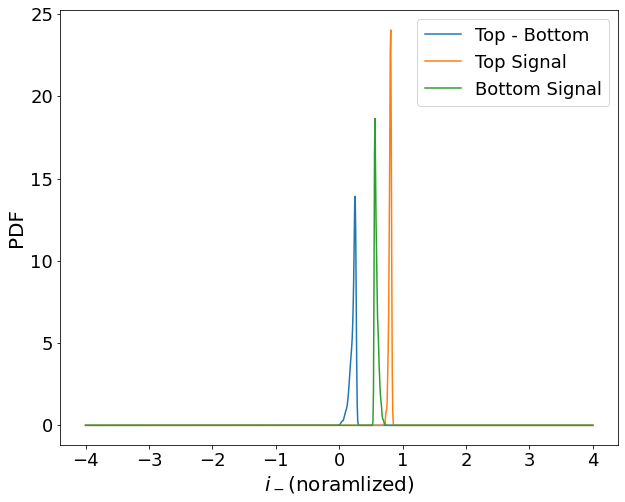

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.plot(i_data, pr_diff_data[1, :])
ax.plot(i_data, pr_top_data[1, :])
ax.plot(i_data, pr_bottom_data[1, :])

ax.legend(["Top - Bottom", "Top Signal", "Bottom Signal"], fontsize=18)


ax.set_xlabel('$i_-$(noramlized)', fontsize=20)
ax.set_ylabel('PDF', fontsize=20)


plt.show()

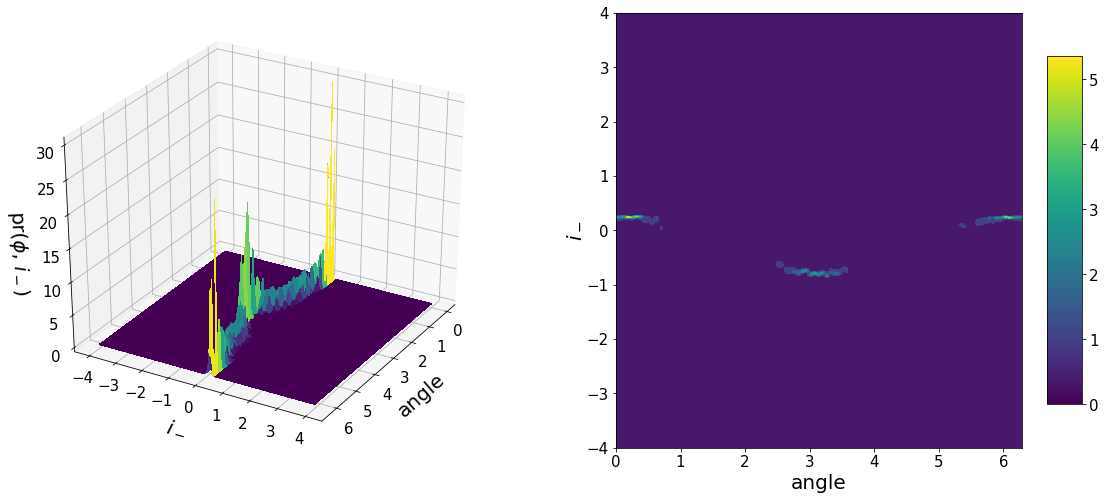

In [4]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

# x = np.arange(-2, 2, 0.1)
# y = np.arange(-2, 2, 0.1)
# w_f = np.zeros((len(x), len(y)), dtype=float)
# # X, Y = np.meshgrid(x, y)
# for i, x_i in enumerate(x):
#     for j, y_j in enumerate(y):
#         w_f[i, j] = wigner_function(x_i, y_j, s_r, s_theta, a_x_ini, a_y_ini)

x, y = np.meshgrid(phi_data, i_data, indexing='ij')

surf = ax.plot_surface(x, y, pr_diff_data, cmap='viridis', antialiased=False)

ax.set_xlabel('angle', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('$i_-$', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('pr($\phi$, $i_-$)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
# Set viewing angle
ax.view_init(elev=30, azim=30)


ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, pr_diff_data)

ax.set_xlabel('angle', fontsize=20)
ax.set_ylabel('$i_-$', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

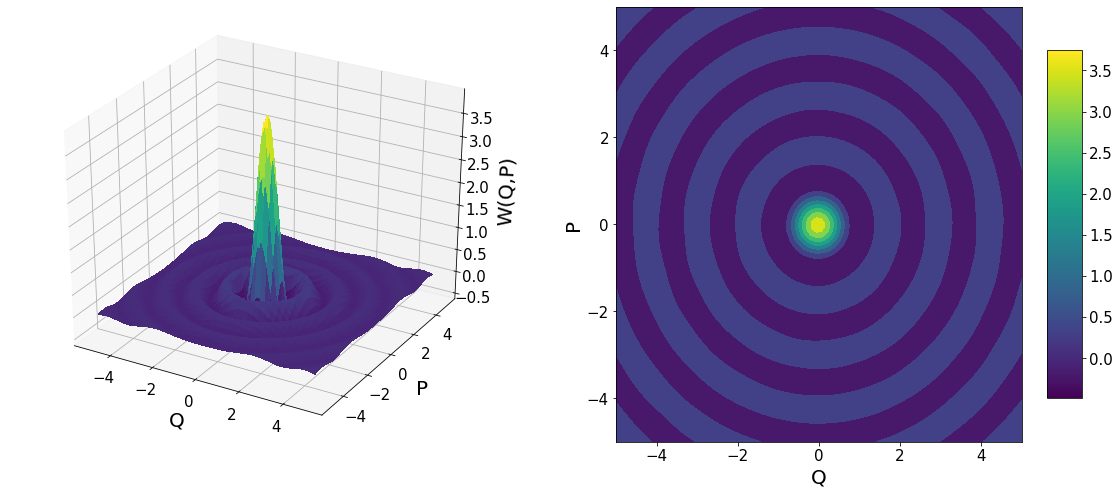

In [9]:
Q = np.loadtxt(f"{load_dir}/Q.dat")
P = np.loadtxt(f"{load_dir}/P.dat")
W = np.loadtxt(f"{load_dir}/W.dat")

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

x, y = np.meshgrid(Q, P)

surf = ax.plot_surface(x, y, W, cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)
# ax.set_xlim([-20, 0])
# ax.set_ylim([-10, 10])


plt.show()

## All time delay

In [26]:
Q = []
P = []
W = []

scan_num = 1

load_dir = "../work_2024_10_05/w_788.16"
timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")

for i in range(len(timedelay)):
    Q.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/Q.dat"))
    P.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/P.dat"))
    W.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/W.dat"))

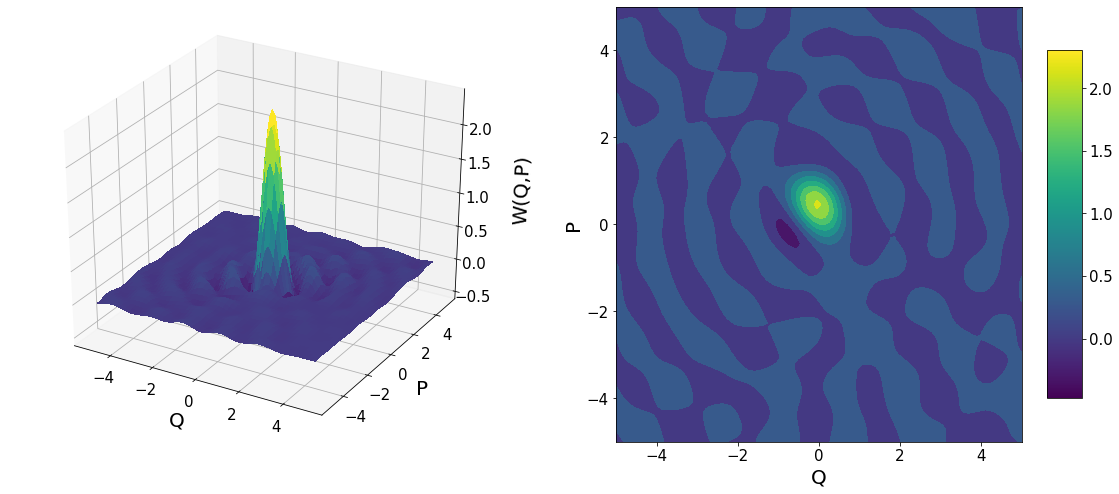

In [27]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

delay_index = 8

x, y = np.meshgrid(Q[delay_index], P[delay_index])

surf = ax.plot_surface(x, y, W[delay_index], cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.zaxis.labelpad=20

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W[delay_index])

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

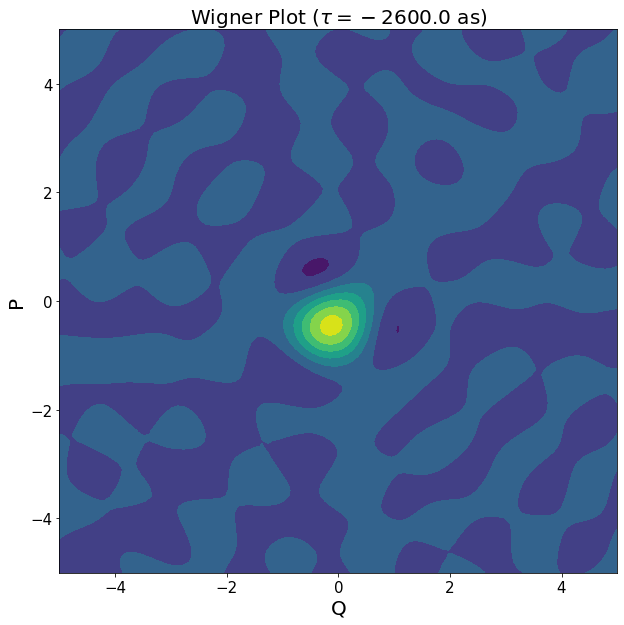

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))


def animate(index):
    x, y = np.meshgrid(Q[index], P[index])


    ax.clear()

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    ax.contourf(x, y, W[index])

    ax.set_xlabel('Q', fontsize=20)
    ax.set_ylabel('P', fontsize=20)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

    # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
    # cbar.ax.tick_params(labelsize=15)


    ax.set_title(f'Wigner Plot ($\\tau = {timedelay[index]}$ as)', fontsize=20)
    # if s_theta != 0:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = \pi/{np.pi/s_theta}$', ha='center', va='center', fontsize=20)
    # else:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = 0$', ha='center', va='center', fontsize=20)

animation = FuncAnimation(fig, animate, frames=range(0, len(timedelay)))
animation.save(f"{load_dir}/w_plot_animation_scan_{scan_num}.gif", dpi = 300, writer=PillowWriter(fps=2))

### Find the center of wigner function

In [136]:
script_dir = os.path.abspath("../src")
sys.path.append(script_dir)

import ellipse_fitting as ef

In [ ]:
Q = []
P = []
W = []

scan_num = 5

load_dir = "/Users/shashank/Downloads/w_798.08"
timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")

for i in range(len(timedelay)):
    Q.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/Q.dat"))
    P.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/P.dat"))
    W.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/W.dat"))

In [103]:
w_center_x = np.zeros(len(timedelay))
w_center_y = np.zeros(len(timedelay))
w_max = np.zeros(len(timedelay))

for delay_index in range(len(timedelay)):
    obj = ef.ellipse_fit(Q[delay_index], P[delay_index], W[delay_index])
    w_center_x[delay_index], w_center_y[delay_index], w_max[delay_index] = obj.find_center()

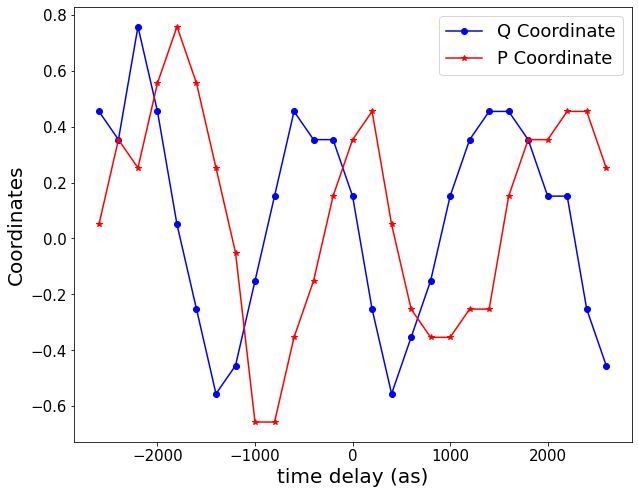

In [104]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.plot(timedelay, w_center_x, '-o', color='b')
ax.plot(timedelay, w_center_y, '-*', color='r')

ax.legend(['Q Coordinate', 'P Coordinate'], fontsize=18)

ax.set_xlabel('time delay (as)', fontsize=20)
ax.set_ylabel('Coordinates', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


plt.show()

### Fit an ellipse to find the squeezing

In [137]:
delay_index = 22

x, y = np.meshgrid(Q[delay_index], P[delay_index])
z = W[delay_index]

obj = ef.ellipse_fit(Q[delay_index], P[delay_index], W[delay_index])
x_intersect, y_intersect, z_intersect, Z_plane = obj.find_intersection()

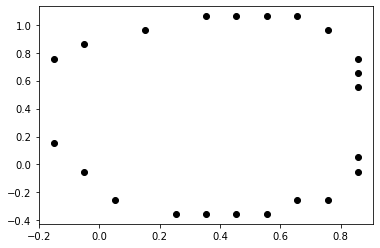

In [138]:
plt.scatter(x_intersect, y_intersect, color='black')

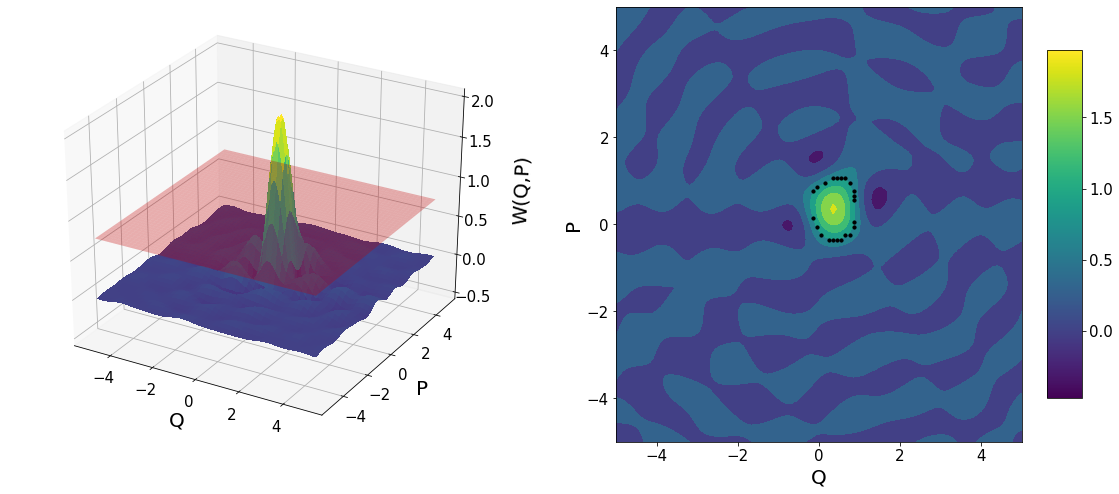

In [139]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

surf = ax.plot_surface(x, y, z, cmap='viridis', antialiased=False)
ax.plot_surface(x, y, Z_plane, color='red', alpha=0.3)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.zaxis.labelpad=20

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, z)
ax.scatter(x_intersect, y_intersect, color='black', s=10, label='Intersection')

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [132]:
# Define ellipse function
def ellipse_implicit(x, y, params):
    A, B, C, D, E, F = params
    return A * x**2 + B * x * y + C * y**2 + D * x + E * y + F

# From the ellipse, find the major axis, minor axis, center and the angle

def canonical_params(params):
    A, B, C, D, E, F = params
    b = -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F)*((A+C) + np.sqrt((A-C)**2 + B**2)))/(B**2 - 4*A*C)
    a = -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F)*((A+C) - np.sqrt((A-C)**2 + B**2)))/(B**2 - 4*A*C)
    x_0 = (2*C*D - B*E)/(B**2 - 4*A*C)
    y_0 = (2*A*E - B*D)/(B**2 - 4*A*C)
    theta = 1/2 * np.arctan2(-B, C-A)

    return a, b, x_0, y_0, theta

In [145]:
opt_parameters = obj.find_opt_params(1e-2*np.array([1,1,1,1,0.1,0.1]))

1000


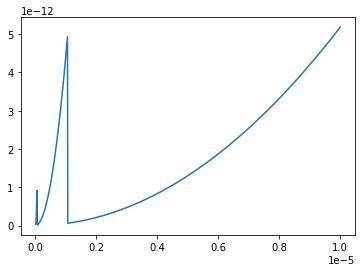

In [110]:
guess_value=np.arange(1e-5,1e-8,-1e-8)
cost_func_values=np.zeros(len(guess_value))
print(len(guess_value))

for i in range(len(guess_value)):
    opt_parameters = obj.find_opt_params(guess_value[i]*np.ones(6))
    cost_func_values[i] = obj.cost_function(opt_parameters, x_intersect, y_intersect)

plt.plot(guess_value, cost_func_values)


In [146]:
print(opt_parameters)
print(obj.cost_function(opt_parameters, x_intersect, y_intersect))

[-3.00965290e-05 -2.29403798e-06 -1.64139120e-05  2.37282891e-05
  1.29272520e-05  2.13671866e-06]
2.0198724331295544e-11


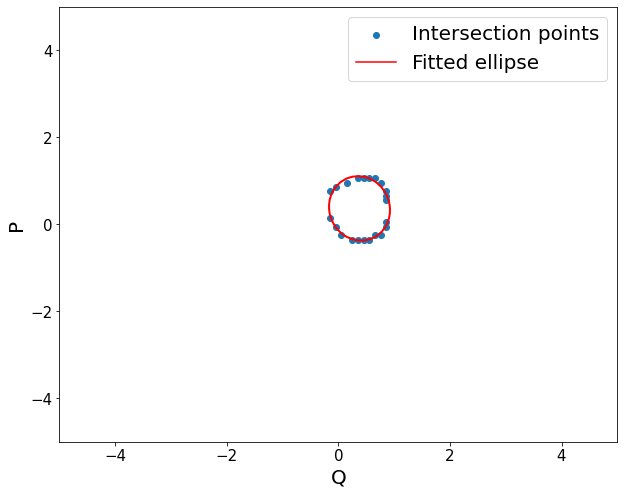

In [147]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

# plot to see if the fitting is correct or not.
z_fit = ellipse_implicit(x, y, opt_parameters)
intersect_plot = ax.scatter(x_intersect, y_intersect, label = 'Intersection points')
ax.contour(x, y, z_fit, levels=[0], colors='red', linewidths=2)

contour_label = plt.Line2D([], [], color='red', label='Fitted ellipse')
ax.legend(handles=[intersect_plot, contour_label], fontsize=20)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [65]:
canonical_params(opt_parameters)

(0.6429927348731382,
 0.7589169627438795,
 0.42314889294511143,
 0.5308549715400871,
 0.3571379115466684)

In [17]:
w_center_x[delay_index], w_center_y[delay_index] # To check if the maximum is closest to the fitted ellipse center

(0.35353535353535354, -0.15151515151515152)

Comibining everything together to get time delay variation 

In [154]:
major_axis = np.zeros(len(timedelay)-1)
minor_axis = np.zeros(len(timedelay)-1)
theta = np.zeros(len(timedelay)-1)
for delay_index in range(1, len(timedelay)): # removing first delay because it is bad data

    obj = ef.ellipse_fit(Q[delay_index], P[delay_index], W[delay_index])
    ini_guess = np.random.rand(1,6)
    opt_params = obj.find_opt_params(ini_guess)
    

    major_axis[delay_index-1], minor_axis[delay_index-1], _, _, theta[delay_index-1] = canonical_params(opt_params)

/Users/shashank/opt/anaconda3/envs/env-tkwant/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


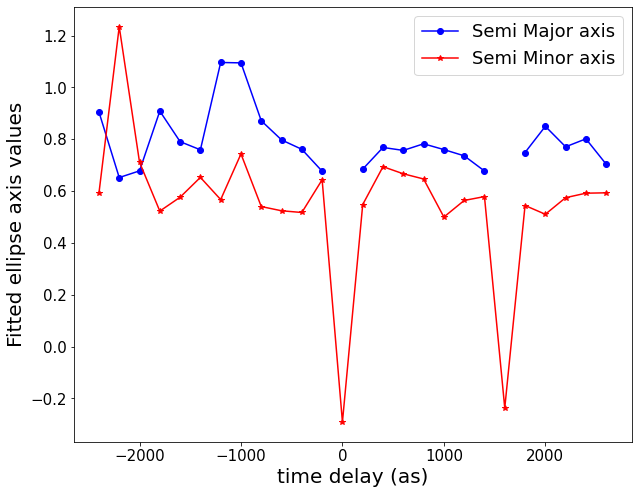

In [155]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.plot(timedelay[1:], major_axis, '-o', color='b')
ax.plot(timedelay[1:], minor_axis, '-*', color='r')
# ax.plot(timedelay[1:], theta, '-d', color='g')

ax.legend(['Semi Major axis', 'Semi Minor axis'], fontsize=18)

ax.set_xlabel('time delay (as)', fontsize=20)
ax.set_ylabel('Fitted ellipse axis values', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


plt.show()

## Automating the plotting and fitting

In [19]:
script_dir = os.path.abspath("../src")
sys.path.append(script_dir)

import ellipse_fitting as ef

In [20]:
parent_dir = Path("../work_2024_10_05")
freq_values = [d.name for d in parent_dir.iterdir() if d.is_dir()]
freq_values.sort()

In [4]:
def animate_wigner_plot(Q,P,W,filepath):
    fig, ax = plt.subplots(figsize=(10, 10))

    def animate(index):
        x, y = np.meshgrid(Q[index], P[index])


        ax.clear()

        # plot a 3D wireframe like in the example mplot3d/wire3d_demo
        ax.contourf(x, y, W[index])

        ax.set_xlabel('Q', fontsize=20)
        ax.set_ylabel('P', fontsize=20)

        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)

        # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
        # cbar.ax.tick_params(labelsize=15)


        ax.set_title(f'Wigner Plot ($\\tau = {timedelay[index]}$ as)', fontsize=20)
        # if s_theta != 0:
        #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = \pi/{np.pi/s_theta}$', ha='center', va='center', fontsize=20)
        # else:
        #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = 0$', ha='center', va='center', fontsize=20)

    animation = FuncAnimation(fig, animate, frames=range(0, len(timedelay)))
    animation.save(filepath, dpi = 300, writer=PillowWriter(fps=2))
    plt.close()


In [5]:
def plot_fitting_center(Q,P,W,filepath):
    w_center_x = np.zeros(len(timedelay))
    w_center_y = np.zeros(len(timedelay))
    w_max = np.zeros(len(timedelay))

    for delay_index in range(len(timedelay)):
        obj = ef.ellipse_fit(Q[delay_index], P[delay_index], W[delay_index])
        w_center_x[delay_index], w_center_y[delay_index], w_max[delay_index] = obj.find_center()

    fig = plt.figure()
    ax = fig.add_subplot()
    fig.set_size_inches(10, 8)

    ax.plot(timedelay, w_center_x, '-o', color='b')
    ax.plot(timedelay, w_center_y, '-*', color='r')

    ax.legend(['Q Coordinate', 'P Coordinate'], fontsize=18)

    ax.set_xlabel('time delay (as)', fontsize=20)
    ax.set_ylabel('Coordinates', fontsize=20)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)


    plt.savefig(filepath, bbox_inches='tight')
    plt.close()

In [17]:
# Define ellipse function
def ellipse_implicit(x, y, params):
    A, B, C, D, E, F = params
    return A * x**2 + B * x * y + C * y**2 + D * x + E * y + F

# From the ellipse, find the major axis, minor axis, center and the angle

def canonical_params(params):
    A, B, C, D, E, F = params
    b = -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F)*((A+C) + np.sqrt((A-C)**2 + B**2)))/(B**2 - 4*A*C)
    a = -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F)*((A+C) - np.sqrt((A-C)**2 + B**2)))/(B**2 - 4*A*C)
    x_0 = (2*C*D - B*E)/(B**2 - 4*A*C)
    y_0 = (2*A*E - B*D)/(B**2 - 4*A*C)
    theta = 1/2 * np.arctan2(-B, C-A)

    return a, b, x_0, y_0, theta


def plot_fitted_ellipse(Q,P,W,filepath):
    fig, ax = plt.subplots(figsize=(10, 8))

    def animate(index):
        x, y = np.meshgrid(Q[index], P[index])
        z= W[index]

        obj = ef.ellipse_fit(Q[index], P[index], W[index])
        x_intersect, y_intersect, z_intersect, Z_plane = obj.find_intersection()

        opt_parameters = obj.find_opt_params([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
        z_fit = ellipse_implicit(x, y, opt_parameters)



        ax.clear()

        # plot a 3D wireframe like in the example mplot3d/wire3d_demo
        intersect_plot = ax.scatter(x_intersect, y_intersect, label = 'Intersection points')
        ax.contour(x, y, z_fit, levels=[0], colors='red', linewidths=2)

        contour_label = plt.Line2D([], [], color='red', label='Fitted ellipse')
        ax.legend(handles=[intersect_plot, contour_label], fontsize=20)

        ax.set_xlabel('Q', fontsize=20)
        ax.set_ylabel('P', fontsize=20)

        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)


        ax.set_title(f'Fitted Ellipse plot ($\\tau = {timedelay[index]}$ as)', fontsize=20)
    
    animation = FuncAnimation(fig, animate, frames=range(0, len(timedelay)))
    animation.save(filepath, writer=PillowWriter(fps=2))
    plt.close()

def plot_ellipse_axes(Q,P,W,filename):
    major_axis = np.zeros(len(timedelay)-1)
    minor_axis = np.zeros(len(timedelay)-1)
    theta = np.zeros(len(timedelay)-1)
    for delay_index in range(1, len(timedelay)): # removing first delay because it is bad data

        obj = ef.ellipse_fit(Q[delay_index], P[delay_index], W[delay_index])
        ini_guess = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
        opt_params = obj.find_opt_params(ini_guess)
        major_axis[delay_index-1], minor_axis[delay_index-1], _, _, theta[delay_index-1] = canonical_params(opt_params)
    
    fig = plt.figure()
    ax = fig.add_subplot()
    fig.set_size_inches(10, 8)

    ax.plot(timedelay[1:], major_axis, '-o', color='b')
    ax.plot(timedelay[1:], minor_axis, '-*', color='r')
    # ax.plot(timedelay[1:], theta, '-d', color='g')
    ax.plot(timedelay[1:], major_axis/minor_axis, '-d', color='g')

    ax.legend(['Semi Major axis', 'Semi Minor axis', 'Ratio'], fontsize=18)

    ax.set_xlabel('time delay (as)', fontsize=20)
    ax.set_ylabel('Fitted ellipse axis values', fontsize=20)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)


    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    

In [22]:
for freq in freq_values:
    load_dir = f"../work_2024_10_05/{freq}"
    timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")
    os.makedirs(f"{load_dir}/Wigner_plots", exist_ok=True)
    for scan_num in range(0,6):
        os.makedirs(f"{load_dir}/fitting_plots/scan_{scan_num}", exist_ok=True)

        Q = []
        P = []
        W = []

        for i in range(len(timedelay)):
            Q.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/Q.dat"))
            P.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/P.dat"))
            W.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/W.dat"))
    
        animate_wigner_plot(Q, P, W, f"{load_dir}/Wigner_plots/w_plot_animation_scan_{scan_num}.gif")
        plot_fitting_center(Q, P, W, f"{load_dir}/fitting_plots/scan_{scan_num}/center_coord.png")
        plot_fitted_ellipse(Q, P, W, f"{load_dir}/fitting_plots/scan_{scan_num}/fitted_ellipse.gif")
        plot_ellipse_axes(Q, P, W, f"{load_dir}/fitting_plots/scan_{scan_num}/ellipse_axes.png")

/Users/shashank/opt/anaconda3/envs/env-tkwant/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/Users/shashank/opt/anaconda3/envs/env-tkwant/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/Users/shashank/opt/anaconda3/envs/env-tkwant/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/Users/shashank/opt/anaconda3/envs/env-tkwant/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/Users/shashank/opt/anaconda3/envs/env-tkwant/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back

# Example plot for testing purpose only

In [2]:
load_dir = "/Users/shashank/Downloads/tau_-390_files"
data = np.loadtxt(f'{load_dir}/T_-0.000200_tau_-0.000390.txt')
data.shape

(1000, 1024)

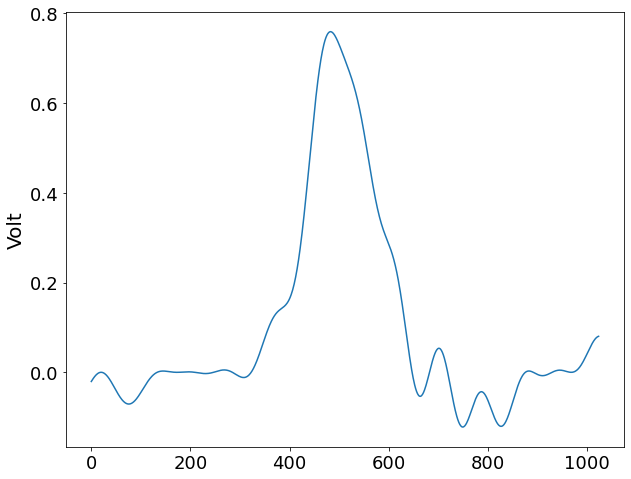

In [230]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.plot(np.arange(0,data.shape[1]),data[0,:])

# ax.legend(["Top - Bottom", "Top Signal", "Bottom Signal"], fontsize=18)


ax.set_xlabel('', fontsize=20)
ax.set_ylabel('Volt', fontsize=20)


plt.show()

In [231]:
homodata = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    homodata[i] = np.sum(data[i,:])/100

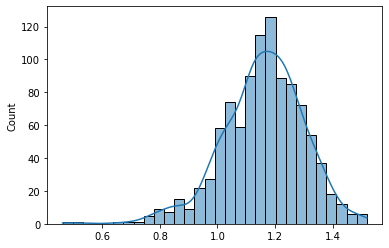

In [232]:
sns.histplot(homodata, kde=True)

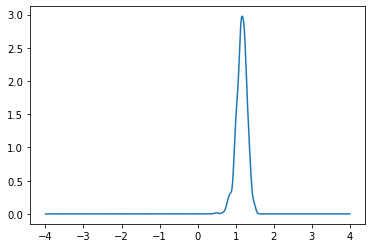

In [233]:
kde1 = gaussian_kde(homodata)
x_eval = np.linspace(-4,4,num=1000)
plt.plot(x_eval, kde1(x_eval))

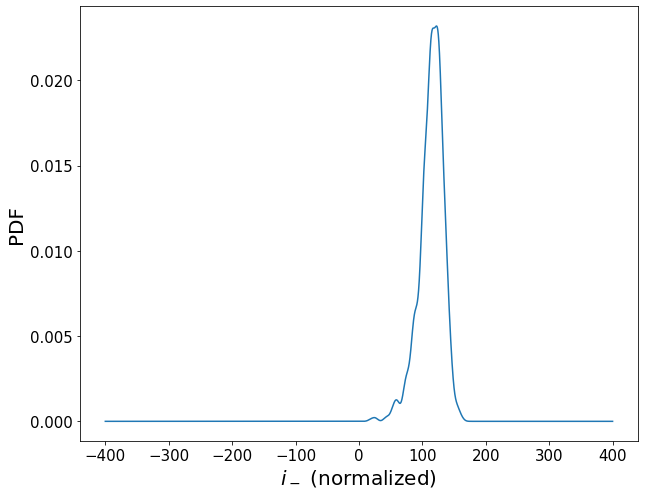

In [234]:
load_dir = "../test_work/tau_-2600.0as/scan_0"
pr_data = np.loadtxt(f"{load_dir}/pr-.dat")
i_data = np.loadtxt(f"{load_dir}/i-.dat")
phi_data = np.loadtxt(f"{load_dir}/phi.dat")

fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.plot(i_data, pr_data[1, :])

ax.set_xlabel('$i_-$ (normalized)', fontsize=20)
ax.set_ylabel('PDF', fontsize=20)


plt.show()

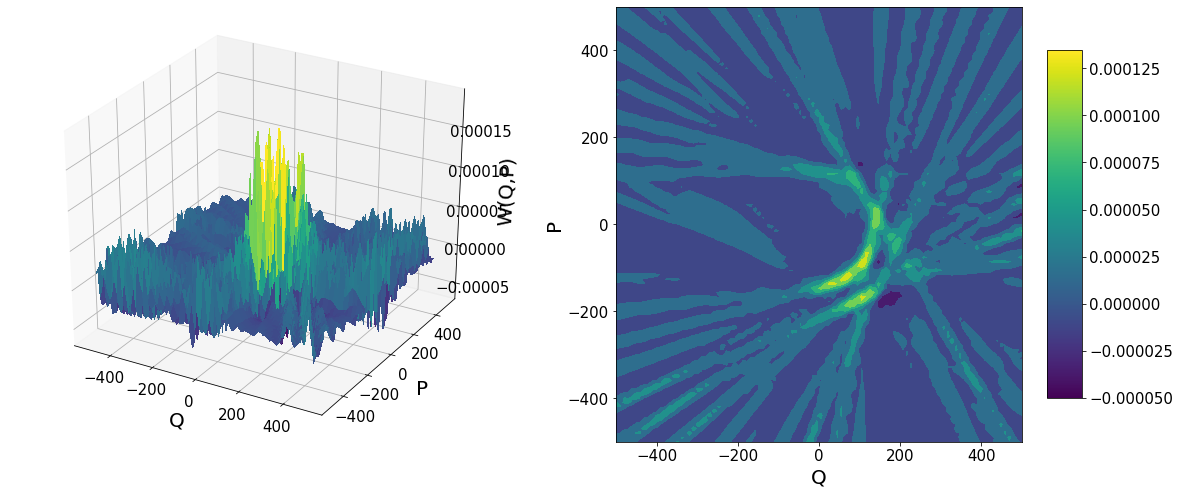

In [235]:
load_dir = "../test_work/tau_-2600.0as/scan_0"
Q = np.loadtxt(f"{load_dir}/Q.dat")
P = np.loadtxt(f"{load_dir}/P.dat")
W = np.loadtxt(f"{load_dir}/W.dat")

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

x, y = np.meshgrid(Q, P)

surf = ax.plot_surface(x, y, W, cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)
# ax.set_xlim([-20, 0])
# ax.set_ylim([-10, 10])


plt.show()

In [20]:
load_dir = "/Users/shashank/Downloads/test_dir"
pr_data = np.loadtxt(f"{load_dir}/pr-.dat")
i_data = np.loadtxt(f"{load_dir}/i-.dat")
phi_data = np.loadtxt(f"{load_dir}/phi.dat")
pr_data.shape

(51, 10000)

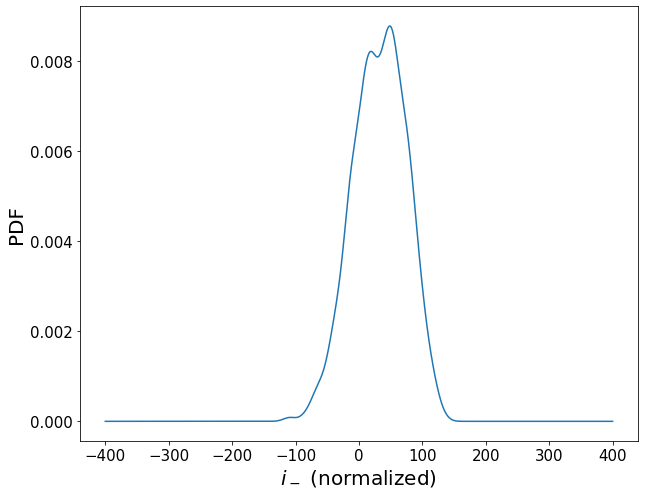

In [49]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.plot(i_data, pr_data[49, :])

ax.set_xlabel('$i_-$ (normalized)', fontsize=20)
ax.set_ylabel('PDF', fontsize=20)


plt.show()

### Find the center of wigner function

In [2]:
script_dir = os.path.abspath("../src")
sys.path.append(script_dir)

import ellipse_fitting as ef

In [3]:
load_dir = "/Users/shashank/Downloads/test_dir"
# timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")

# for i in range(len(timedelay)):
Q=np.loadtxt(f"{load_dir}/Q.dat")
P=np.loadtxt(f"{load_dir}/P.dat")
W=np.loadtxt(f"{load_dir}/W.dat")

### Fit an ellipse to find the squeezing

In [4]:
x, y = np.meshgrid(Q, P)
z = W

obj = ef.ellipse_fit(Q, P, W)
# print(obj.find_center())
x_intersect, y_intersect, z_intersect, Z_plane = obj.find_intersection()

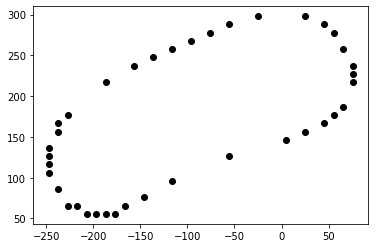

In [5]:
plt.scatter(x_intersect, y_intersect, color='black')

In [6]:
x_c, y_c, _ = obj.find_center()

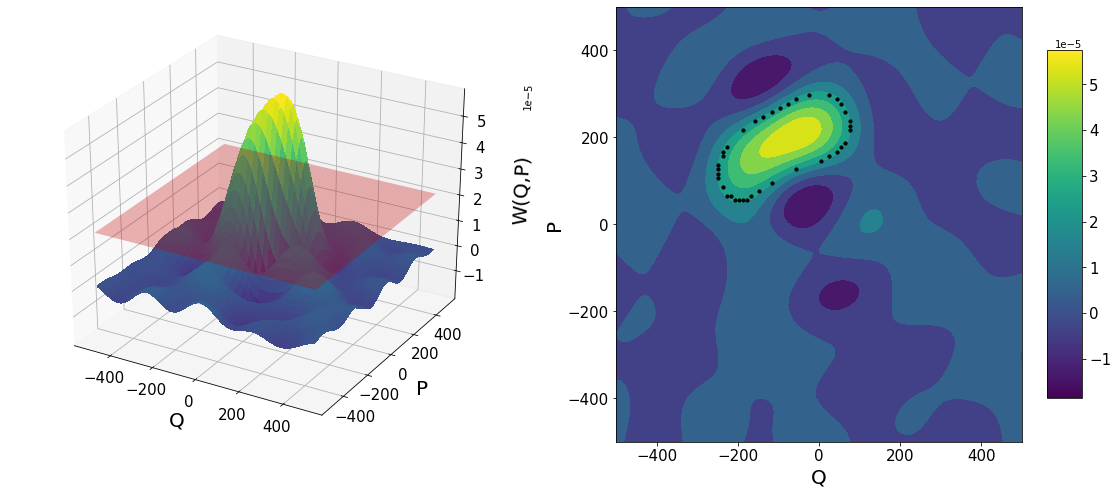

In [7]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

surf = ax.plot_surface(x, y, z, cmap='viridis', antialiased=False)
ax.plot_surface(x, y, Z_plane, color='red', alpha=0.3)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.zaxis.labelpad=20

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, z)
ax.scatter(x_intersect, y_intersect, color='black', s=10, label='Intersection')

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

In [8]:
# Define ellipse function
# def ellipse_implicit(x, y, params):
#     A, B, C, D, E, F = params
#     return A * x**2 + B * x * y + C * y**2 + D * x + E * y + F
def ellipse_implicit(x, y, params):
        a,b,x0,y0,tilt = params
        return ((x-x0)*np.cos(tilt) + (y-y0)*np.sin(tilt))**2/a**2 + ((x-x0)*np.sin(tilt) - (y-y0)*np.cos(tilt))**2/b**2 - 1
        


# From the ellipse, find the major axis, minor axis, center and the angle

def canonical_params(params):
    A, B, C, D, E, F = params
    b = -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F)*((A+C) + np.sqrt((A-C)**2 + B**2)))/(B**2 - 4*A*C)
    a = -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F)*((A+C) - np.sqrt((A-C)**2 + B**2)))/(B**2 - 4*A*C)
    x_0 = (2*C*D - B*E)/(B**2 - 4*A*C)
    y_0 = (2*A*E - B*D)/(B**2 - 4*A*C)
    theta = 1/2 * np.arctan2(-B, C-A)

    return a, b, x_0, y_0, theta

In [12]:
# opt_parameters = obj.find_opt_params(np.array([-1.29083638e-07, -3.46047320e-09, -1.97017779e-07, -1.39926914e-05,
# 5.32838685e-05, -2.29314761e-05]))
opt_parameters = obj.find_opt_params(np.array([200, 100, x_c, y_c, 0]))

In [9]:
guess_value=np.arange(1e-4,1e-7,-1e-7)
cost_func_values=np.zeros(len(guess_value))
print(len(guess_value))

for i in range(len(guess_value)):
    opt_parameters = obj.find_opt_params(guess_value[i]*np.array([-0.1, -0.1, -0.1, -1, 1, -1]))
    cost_func_values[i] = obj.cost_function(opt_parameters, x_intersect, y_intersect)

plt.plot(guess_value, cost_func_values)


1000


ValueError: too many values to unpack (expected 3)

In [14]:
print(opt_parameters)
print(obj.cost_function(opt_parameters, x_intersect, y_intersect))

[191.39271423  84.25717093 -86.75514699 180.39457845   0.50555451]
0.6877491748190016


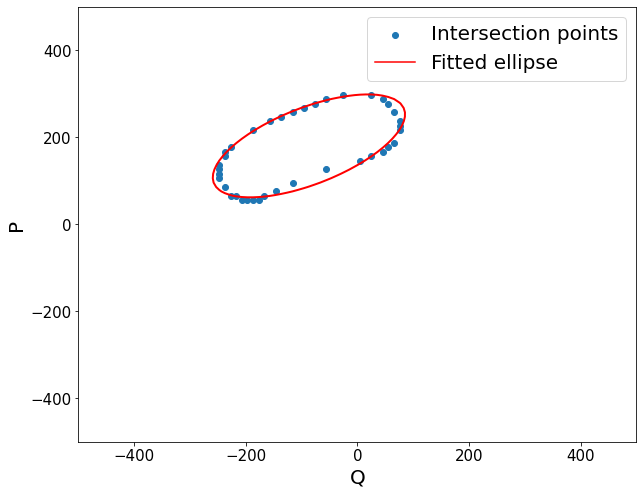

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

# plot to see if the fitting is correct or not.
z_fit = ellipse_implicit(x, y, opt_parameters)
intersect_plot = ax.scatter(x_intersect, y_intersect, label = 'Intersection points')
ax.contour(x, y, z_fit, levels=[0], colors='red', linewidths=2)

contour_label = plt.Line2D([], [], color='red', label='Fitted ellipse')
ax.legend(handles=[intersect_plot, contour_label], fontsize=20)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

Comibining everything together to get time delay variation 

In [ ]:
major_axis = np.zeros(len(timedelay)-1)
minor_axis = np.zeros(len(timedelay)-1)
theta = np.zeros(len(timedelay)-1)
for delay_index in range(1, len(timedelay)): # removing first delay because it is bad data

    obj = ef.ellipse_fit(Q[delay_index], P[delay_index], W[delay_index])
    ini_guess = np.random.rand(1,6)
    opt_params = obj.find_opt_params(ini_guess)
    

    major_axis[delay_index-1], minor_axis[delay_index-1], _, _, theta[delay_index-1] = canonical_params(opt_params)

/Users/shashank/opt/anaconda3/envs/env-tkwant/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


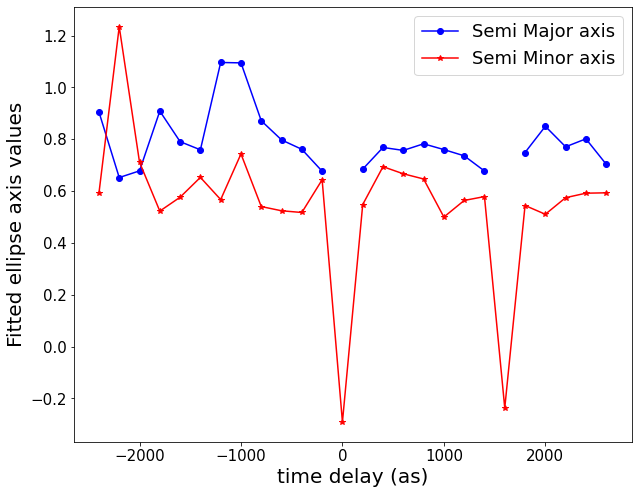

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

ax.plot(timedelay[1:], major_axis, '-o', color='b')
ax.plot(timedelay[1:], minor_axis, '-*', color='r')
# ax.plot(timedelay[1:], theta, '-d', color='g')

ax.legend(['Semi Major axis', 'Semi Minor axis'], fontsize=18)

ax.set_xlabel('time delay (as)', fontsize=20)
ax.set_ylabel('Fitted ellipse axis values', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


plt.show()

# Band Pass filter on the Wigner distribution

In [3]:
load_dir = "/Users/shashank/Downloads/tau_-2400.0as/scan_0"

In [94]:
Q = []
P = []
W = []

scan_num = 3

load_dir = "/Users/shashank/Downloads/w_798.08"
timedelay = np.loadtxt(f"{load_dir}/timedelay.dat")

for i in range(len(timedelay)):
    Q.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/Q.dat"))
    P.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/P.dat"))
    W.append(np.loadtxt(f"{load_dir}/tau_{timedelay[i]}as/scan_{scan_num}/W.dat"))
Q = np.array(Q)
P = np.array(P)
W = np.array(W)

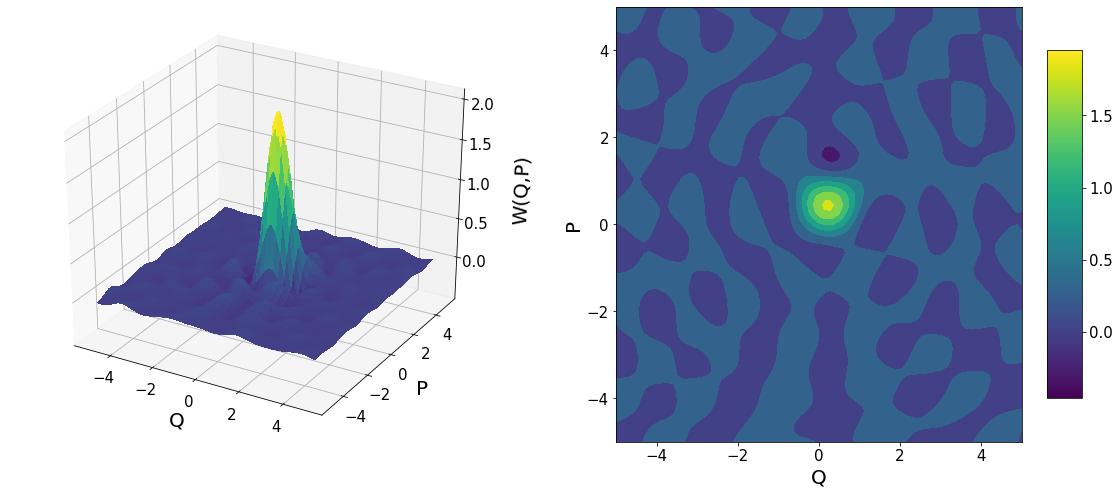

In [95]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

delay_index = 8

x, y = np.meshgrid(Q[delay_index], P[delay_index])

surf = ax.plot_surface(x, y, W[delay_index], cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.zaxis.labelpad=20

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W[delay_index])

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

## Band Pass filtering

In [96]:
def gaussian_filter(x,x0,width,n=8):
    sigma = width/(2*np.sqrt(2*np.log(2)))
    return np.exp(-(x-x0)**n/(sigma)**2)

In [97]:
w_mid = W[:, 50, 50]

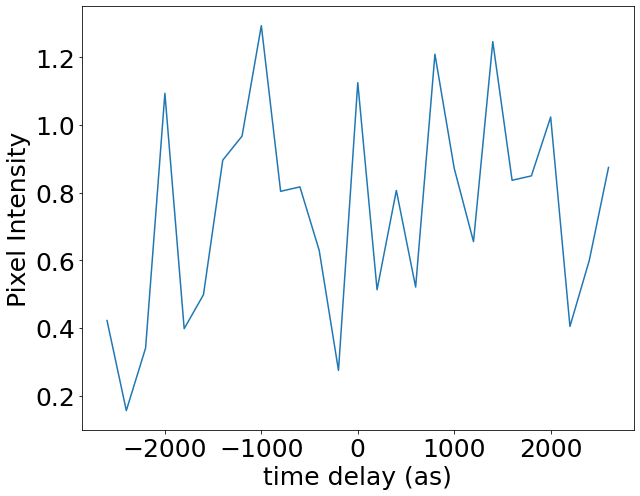

In [106]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9, 7)

# color = 'b'
ax.set_xlabel('time delay (as)', fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelcolor='k', labelsize=25)
ax.set_ylabel('Pixel Intensity', color='k', fontsize=25)

# time_delay = np.arange(20, -20.2, -0.2)
# time_delay = np.arange(-20, 20.2, 0.2)

ax.plot(timedelay, w_mid)
# ax.set_xlim([0, 5*w0/(2*np.pi)])


fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig("graphics/other_k_points/chirp.pdf")
plt.show()

In [111]:
N_delay = len(timedelay)
w_mid_fft = fft(w_mid)
delay_freq = fftfreq(N_delay, timedelay[1]-timedelay[0])

w0 = 2.35/1000 # in rad/as

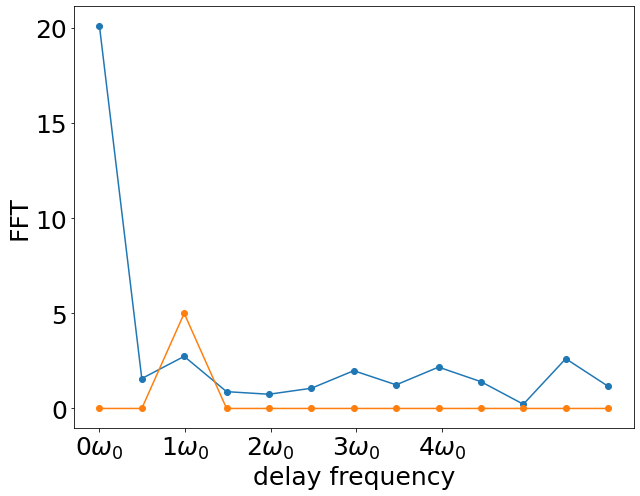

In [117]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9, 7)

# color = 'b'
ax.set_xlabel('delay frequency', fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelcolor='k', labelsize=25)
ax.set_ylabel('FFT', color='k', fontsize=25)


ax.plot(delay_freq[:N_delay//2], abs(w_mid_fft[:N_delay//2]), '-o')
ax.plot(delay_freq[:N_delay//2], 5*gaussian_filter(delay_freq[:N_delay//2], w0/(2*np.pi), 1e-16), '-o')

w_mid_fft_filter = w_mid_fft * (gaussian_filter(delay_freq, w0/(2*np.pi), 1e-16) + gaussian_filter(delay_freq, -w0/(2*np.pi), 1e-16))



ax.set_xticks([n*w0/(2*np.pi) for n in range(5)])
ax.set_xticklabels([str(n)+'$\omega_0$' for n in range(5)], fontsize=25)


# ax.set_xlim([0, 5*w0/(2*np.pi)])


fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig("graphics/other_k_points/chirp.pdf")
plt.show()

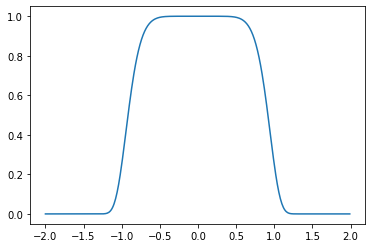

In [27]:
x = np.arange(-2,2,0.01)
plt.plot(x, gaussian_filter(x,0,2))

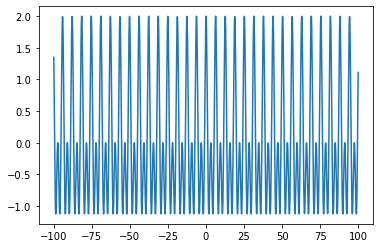

In [36]:
x = np.arange(-100,100,0.1)
y = np.cos(x) + np.cos(2*x)

plt.plot(x,y)

(0.0, 1.0)

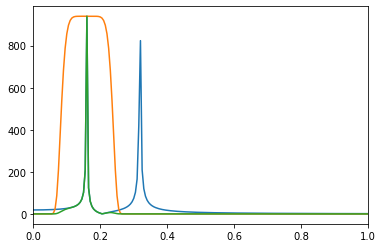

In [77]:
N = len(x)
y_fft = fft(y)
y_freq = fftfreq(N, x[1]-x[0])
filter_width = 0.0001

plt.plot(y_freq[:N//2], abs(y_fft[:N//2]))
plt.plot(y_freq[:N//2], max(abs(y_fft))*gaussian_filter(y_freq[:N//2], 0.16, filter_width))
y_fft_filter = y_fft*(gaussian_filter(y_freq, 0.16, filter_width)+gaussian_filter(y_freq, -0.16, filter_width))
plt.plot(y_freq[:N//2], abs(y_fft_filter[:N//2]))
plt.xlim([0,1])

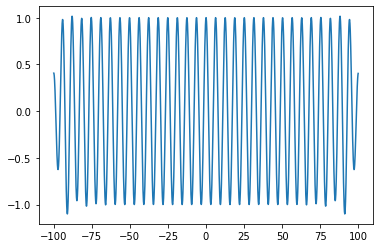

In [79]:
y_filter = ifft(y_fft_filter)
plt.plot(x, np.real(y_filter))